# 教師あり学習（分類）の基礎

- **[1.1 教師あり学習（分類）を知る](#1.1-教師あり学習（分類）を知る)**
    - **[1.1.1 「分類」とは](#1.1.1-「分類」とは)**
    - **[1.1.2 二項分類と多項分類](#1.1.2-二項分類と多項分類)**
    - **[1.1.3 分類の流れ](#1.1.3-分類の流れ)**
    - **[1.1.4 データを用意する](#1.1.4-データを用意する)**
    - **[1.1.5 学習と予測](#1.1.5-学習と予測)**
<br><br>
- **[1.2 主な手法の紹介](#1.2-主な手法の紹介)**
    - **[1.2.1 ロジスティック回帰](#1.2.1-ロジスティック回帰)**
    - **[1.2.2 線形SVM](#1.2.2-線形SVM)**
    - **[1.2.3 非線形SVM](#1.2.3-非線形SVM)**
    - **[1.2.4 決定木](#1.2.4-決定木)**
    - **[1.2.5 ランダムフォレスト](#1.2.5-ランダムフォレスト)**
    - **[1.2.6 k-NN](#1.2.6-k-NN)**
<br><br>
- **[1.3 添削問題](#1.3-添削問題)**

***

## 1.1 教師あり学習（分類）を知る

### 1.1.1 「分類」とは

**はじめに**<br>
今回の講座の一部は以下の参考文献を元に製作されています。実装をメインに学習をしていきますが、理論的な部分についてさらに詳しく学びたいという方は、以下を読むと良いでしょう。
<a href="https://book.impress.co.jp/books/1117101099" target="_blank">[Python機械学習プログラミング 達人データサイエンティストによる理論と実践]</a>



***

機械学習は主に3つの分野に分かれます。

- **<font color=#AA0000>教師あり学習</font>**<br>
正解ラベル付きのトレーニングデータからモデルを学習し、未知のデータに対して予測を行います。教師あり学習は以下の２つに分類されます。

    - 分類問題
     カテゴリ別に分けてあるデータを学習し、未知のデータのカテゴリ(離散値)を予測します。
     **このコンテンツではこの分類問題に対するアルゴリズムの理解や簡単な問題の実装を行います。** 実践的な応用例として、メールのスパム判定などが挙げられます。
       
    - 回帰問題(コンテンツ:<a href="https://aidemy.net/courses/5010" target="_blank">[教師あり学習(回帰)]</a>)<br>
      分類問題と違って、こちらは連続値を予測します。株価の予測などはこちらに分類されます。アルゴリズムとしてはk-means手法などが有名です。

- **<font color=#AA0000>教師なし学習</font>**(コンテンツ:<a href="https://aidemy.net/courses/5030" target="_blank">[教師なし学習]</a>)<br>
正解ラベルのついていないデータや構造が不明なデータに対し、データの構造や関係性を機械が見出すことを指します。  例として、小売店の顧客の傾向やクラスタリングなどが挙げられます。

- **<font color=#AA0000>強化学習</font>**<br>
環境とのやりとりに基づいて性能を改善することを目的とします。行動に対して報酬を設定し、状態に応じて目標の利益を得られる行動を取るように学習させます。
例として、囲碁などの対戦型AIなどがあります。


#### 問題

- 次のうち機械学習の「分類」として扱われる事例はどれでしょうか。選択してください。

1. 株価の予測
1. メールのスパム判定
1. 対戦型ゲームのAI
1. 上記の全て

#### ヒント

- 教師あり学習はデータとラベルの関係性からデータのラベルを予測します。
- 回帰は主に数値を、分類はデータがどこに属するかを予測します。
- 教師なし学習はデータの構造やデータ同士の関連性を調べます。
- 強化学習は学習時に自身が達成する目標を定めそのために必要な行動を最適化していきます。

#### 解答

メールのスパム判定

***

### 1.1.2 二項分類と多項分類

分類問題は、大まかに **<font color=#AA0000>二項分類</font>** と **<font color=#AA0000>多項分類</font>** の問題に分けられます。

- **二項分類** （二値分類、２クラス分類とも言います）  
    分類するカテゴリー（クラスといいます）が２つの分類問題のことです。どちらか一方のグループに「属している/いない」のみで識別できます。また、直線でクラス間を識別できる場合は **線形分類** といい、そうでない場合は **非線形分類** といいます。


- **多項分類** （多クラス分類とも言います）  
    クラスが３つ以上の分類問題のことです。これはどれか一つのグループに「属している/いない」だけでは識別ができない上、単に直線では識別できない場合が多いです。

#### 問題

以下の散布図において青と橙のデータを教師データとして学習し、どちらに属するかを分類する問題は何と言うでしょうか。

<img src="https://aidemyexcontentspic.blob.core.windows.net/contents-pic/5020_classification/classification_chap1_10.png">

1. 二項分類（線形）
1. 二項分類（非線型）
1. 多クラス分類

#### ヒント

- クラス数、直線で識別できそうかに注目しましょう。

#### 解答例

二項分類（線形）

***

### 1.1.3 分類の流れ

機械学習は以下に示すような一連の流れがあります。

**1.データの前処理**
  - データの整形、操作
 

**2.モデルの選択**
  - 分類器の選択
 
**3.モデルの学習**
  - チューニングをするハイパーパラメーターの選択
  - パラメーターのチューニング

**4.モデルによる予測（推論)**
  - 未知のデータを使ってモデルの精度検証
  - WEBサービスなどに組み込み、AIモデルを実運用
 
今回扱う「教師あり学習（分類）」モデルでは、「2. モデルの選択」の部分で様々な「分類モデル」を選択することになります。開発の現場では、学習データや目的によって、最適の分類モデルを選択し、最大の性能を出すようチューニングすることが求められます。


<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/153190785150794.PNG">

#### 問題

- 次の文章を機械学習の流れに沿って並べ替えた時の順番を以下の選択肢から選んでください。
    1. モデルによる予測
    1. モデルの選択
    1. データの前処理
    1. モデルの学習

- 1 -> 4 -> 2 -> 3
- 1 -> 2 -> 3 -> 4
- 3 -> 2 -> 4 -> 1
- 2 -> 3 -> 4 -> 1

#### ヒント

- モデルは学習を行ったのちに予測を行います。
- データの前処理はモデル選択より前に行います。

#### 解答

3 -> 2 -> 4 -> 1

***

### 1.1.4 データを用意する方法(1)

様々な分類の手法について実際にコードを動かして学ぶ際に、分類ができそうなデータを用意する必要があります。
実用レベルでは実際に測定された何かしらの値を入手し、整形する段階が必要になりますが、今回はその部分は省き、練習用に架空の分類用データを自分で作成する方法や、サンプルデータの取得方法を紹介します。
***
分類に適した架空のデータを作成するには、scikit-learn.datasetsモジュールの `make_classification()` 関数を使います。
教師あり学習による分類では、データとそのデータがどのクラスに属しているかを表すラベルが必要です。  
`make_classification()` 関数を用いれば任意のデータ数、ラベルの種類を引数で設定することが出来ます。

```python
# モジュールのimport
from sklearn.datasets import make_classification
# データX, ラベルyの生成
X, y = make_classification(n_samples=XX, n_classes=XX, n_features=XX, n_redundant=XX, random_state=XX)
```
上記関数の各引数は以下のとおりです。

- n_samples<br>
    用意するデータの個数
- n_classes<br>
    クラス数。指定しないと値は2になります
- n_features<br>
    データの特徴量の個数
- n_redundant<br>
    分類に不要な特徴量（余分な特徴量）の個数
- random_state<br>
    乱数のシード（乱数のパターンを決定する要素）


他にも引数はありますが、このコンテンツではこれらを定義したデータを作成していきます。  
また、データがどのクラスに属しているかを示す「ラベル(y)」が用意されますが、基本的に整数値によってラベルを用意します。  
例えば二項分類であれば各データのラベルは「0」または「1」になります。

#### 問題

- 特徴量2, 不要な特徴量は無い二項分類用データXとそのラベルyを50個作成してください
- その際の乱数のシードは0としてください
- `y=0`となるXの座標を青、`y=1`となるXの座標を赤くプロットします。

In [ ]:
# モジュールのimport
from sklearn.datasets import make_classification
# プロット用モジュール
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データX, ラベルyを生成
X, y = 


# データの色付け、プロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
plt.grid(True)
plt.show()


#### ヒント

- make_classification関数はXとyを同時に返します
- 二項分類のためクラス数は2です

#### 解答例

In [ ]:
# モジュールのimport
from sklearn.datasets import make_classification
# プロット用モジュール
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データX, ラベルyを生成
X, y = make_classification(n_samples=50, n_features=2,
                           n_redundant=0, random_state=0)

# データの色付け、プロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
plt.grid(True)
plt.show()


***

### 1.1.5 データを用意する方法(2)

このchapterでは、教師あり学習の分類いくつかの学習方法を学びます。scikit-learnライブラリは主に、最適化された分類アルゴリズムの実装をメインに使用されます。しかしscikit-learnライブラリにはこれらだけでなく、データの前処理や、モデルの調整や評価を行うための関数も用意されています。また、アルゴリズムの実験やテスト用にいくつかのデータセットが用意されており、Pythonのモジュールを指定することでデータを呼び出すことが出来ます。ここではその１つであるIrisデータの取得方法を紹介します。
***

Irisデータとは150個のアヤメ(花の一種)のサンプルの「がく片の長さ」「がく片の幅」「花びらの長さ」「花びらの幅」の４つの特徴量(単位はcm)と、3種の品種(0~2)が格納されています。ここでは、データの可視化のために特徴量を「がくの長さ」「花びらの長さ」の２つだけを使用していきます。

Irisデータのイメージ図
<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531918623552119.PNG">
※値は正しい値ではありません

```python
# scikit-learnライブラリdetasetモジュールのimport
from sklearn import datasets
import numpy as np

# データを取得
iris = datasets.load_iris()
# irisの0列目と2列目を格納
X = iris.data[:, [0, 2]]
# irisのクラスラベルを格納
y = iris.target
```

また、トレーニングされたモデルの性能を未知のデータで評価するために、データセットをさらにトレーニングデータとテストデータに分割します。
以下のように、scikit-learnのmodel_selectionモジュールのtrain_test_split関数を使用して、X配列とy配列を30%のテストデータと70%のトレーニングデータにランダムに分割しています。

```python
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)
```

このchapterにおいては、このIrisデータを用いて、学習アルゴリズムの実装を行います。

#### 問題

- scikit-learnライブラリから、Irisデータを取得し、「がくの長さ」「花びらの長さ」の２つの特徴量を`X`に、クラスラベルを`y`に格納してください。
- がくの長さを横軸に、花びらの長さを縦軸にプロットできていることを確認してください。

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データを取得してください
iris = 
# irisの0列目と2列目を格納してください
X = 
# irisのクラスラベルを格納してください
y = 

# データの色付け、プロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=0.7)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


#### ヒント

- make_classification関数はXとyを同時に返します
- 二項分類のためクラス数は2です

#### 解答例

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データを取得してください
iris = datasets.load_iris()
# irisの0列目と2列目を格納してください
X = iris.data[:, [0, 2]]
# irisのクラスラベルを格納してください
y = iris.target

# データの色付け、プロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=0.7)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


***

### 1.1.6 学習と予測

機械学習において、学習方法は複数存在します。  学習方法のことを **モデル** と呼ぶことにします。  (厳密には学習方法ではなく教師データから学習を行い、ラベルを予測するまでの一連の流れの概形のことを指します。)
    
また、機械学習によってデータの分類ができるプログラムのことを **分類器** と呼ぶことにしましょう。
    
機械学習のモデルを全て自分で実装するのは大変ですが、Pythonには機械学習に特化したライブラリがたくさん存在します。  その中でもscikit-learnは機械学習のモデルがあらかじめ用意されたライブラリです。
***
さて、まずは架空のモデルClassifierを例にした使い方を見てみましょう。

```python
# モジュールのインポート
# モデルごとに別のモジュールを参照する(以下例)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# モデルの構築
model = Classifier()
# モデルの学習
model.fit(train_X, train_y)
# モデルによるデータの予測
model.predict(test_X)

# モデルの正解率
# 正解率は (モデルの予測した分類と実際の分類が一致したデータの数) ÷ (データの総数) で算出されます
model.score(test_X, test_y)
```

実際の機械学習のコードを書く際には、`Classifier()`の部分を実際のモデルと差し替えることになります。
scikit-learnを利用することによって、以上のようにかなりシンプルに機械学習を実践できるのが魅力です。

#### 問題

- データ train_X、train_y を使って用意したモデルに学習させてみましょう。
- また、test_Xデータに対して予測を行い、結果を出力してください。


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
# データを学習に使う分と評価の分に分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LogisticRegression(random_state=42)

# train_Xとtrain_yを使ってモデルに学習させてください


# test_Xに対するモデルの分類予測結果を格納してください
pred_y = 

print("予測:"+ str(pred_y))
print("実際:"+ str(test_y))


#### ヒント

- `fit`メソッドと`predict`メソッドを使います。
- 予測結果は直接出力しても変数に代入してから出力しても構いません。

#### 解答例

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
# データを学習に使う分と評価の分に分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LogisticRegression(random_state=42)

# train_Xとtrain_yを使ってモデルに学習させる
model.fit(train_X, train_y)

# test_Xに対するモデルの分類予測結果
pred_y = model.predict(test_X)

print("予測:"+ str(pred_y))
print("実際:"+ str(test_y))


***

## 1.2 主な手法の紹介

### 1.2.1 ロジスティック回帰

先ほど作ったデータをグラフにしたものからモデルを学習していきましょう。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531852179094452.png" width="500px">
３色で色分けされた点がグラフ上に描画されていますね。

#### 特徴
    
上のグラフは、色を識別するための直線を作ることができそうです。
    
このように**直線**でデータのカテゴリーのグループに分けることができるデータを**線形分離可能な**データと呼びます。
    
 **ロジスティック回帰** は線形分離可能なデータの境界線を学習によって見つけてデータの分類を行なう手法です。  
    
特徴としては境界線が**直線**になることです。そのため、二項分類などクラスの少ないデータに用いられます。
また、データがクラスに分類される確率も計算することが可能です。これらの特徴から主に「天気予報の降水確率」など、分類される確率を知りたい時に用いられます。
    
欠点としてはトレーニングデータが線形分離可能でないと分類ができないということです。また高次元の疎なデータには適しません。
また、トレーニングデータから学習した境界線はクラスの端にあるデータのすぐそばを通るようになるため、一般化した境界線になりにくい（汎化能力が低い）ことも欠点です。
***
#### 実装例

ロジスティック回帰モデルはscikit-learnライブラリのlinear_modelサブモジュール内に`LogisticRegression()`として定義されています。  
ロジスティック回帰モデルを使って学習する場合、次のようなコードを書いてモデルを呼び出します。
    
```Python
# パッケージからモデルを呼び出す
from sklearn.linear_model import LogisticRegression

# モデルを構築する
model = LogisticRegression()

# モデルに学習させる
# train_data_detailはデータのカテゴリーを予測するために使う情報をまとめたもの
# train_data_labelはデータの属するクラスのラベル
model.fit(train_data_detail, train_data_label)

# モデルに予測させる
model.predict(data_detail)

# モデルの予測結果の正解率
model.score(data_detail, data_true_label)
```
***

可視化の作業では、学習させたモデルを使用して、グラフ内の細かいプロット点全てに対して予測を行うことで、データをどのように分割しているかを色別に示すことができます。
グラフの視覚化にはmatplotlibライブラリを使います。他の学習モデルに関しても、同様の方法で可視化を行い、比較します。

```Python
# 全データを散布図にプロットし、ラベルごとに色を分ける
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
# グラフの範囲を決定
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# グラフを0.02ごとに区切った時の交点の座標を格納
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
# 全てのxx1,xx2のペアに対して、学習モデルで予測を行う
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
# 座標(xx1, xx2)にZを描画
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
# 範囲、ラベル、タイトル、グリッドを指定
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LogisticRegression")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

```

#### 問題

- ロジスティック回帰を用いてデータの分類を予測して、変数pred_yに代入してください。
- 可視化されたグラフをみて、線形分離の様子を確認してください。

/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[2 0 2 1 1 0 1 1 1 1 2 0 0 0 0 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


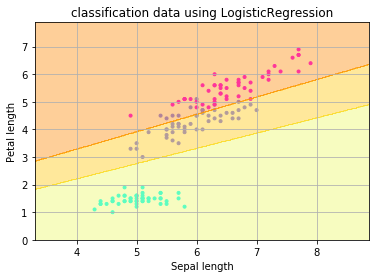

In [2]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

# データを取得
iris = datasets.load_iris()
# irisの0列目と2列目を格納
X = iris.data[:, [0, 2]]
# irisのクラスラベルを格納
y = iris.target
# trainデータ、testデータの分割
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# ロジスティック回帰モデルの構築
model = LogisticRegression()
model.fit(train_X, train_y)
# train_Xとtrain_yを使ってモデルに学習させる

# test_Xに対するモデルの分類予測結果
y_pred = model.predict(test_X)
print(y_pred)


# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LogisticRegression")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


#### ヒント

- モデルの構築と学習が終わった後にグラフの生成を行います。
- 境界線のコードは説明文を参考にしてください。

#### 解答例

In [ ]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

# データを取得
iris = datasets.load_iris()
# irisの0列目と2列目を格納
X = iris.data[:, [0, 2]]
# irisのクラスラベルを格納
y = iris.target
# trainデータ、testデータの分割
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model = LogisticRegression()

# train_Xとtrain_yを使ってモデルに学習させる
model.fit(train_X, train_y)

# test_Xに対するモデルの分類予測結果
y_pred = model.predict(test_X)
print(y_pred)


# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LogisticRegression")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


***

### 1.2.2 線形SVM

#### 特徴

 **SVM（サポートベクターマシン)** はロジスティック回帰と同じくデータの境界線を見つけることでデータの分類を行なう手法です。
その最大の特徴はサポートベクターとよばれるベクトルです。
    
サポートベクターはクラスごとの境界線に最も近いデータと境界線の距離のことを指します。
(厳密には距離を表すベクトルのことです)

このサポートベクターの距離の総和を最大化しようとする(この問題をマージン最大化と言います。)ことによって境界線を決定する手法がSVMです。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1527855492049547.PNG" width="300px">

    
SVMは分類する境界線が二クラス間の最も離れた場所に引かれるためロジスティック回帰と比べて一般化されやすく、
データの分類予測が向上する傾向が見られます。
また、境界線の決定にはサポートベクターのみを考えればよいため、筋道がたちやすいのも特徴です。
    
欠点としてデータ量が増えると計算量が増えてしまうため、他の手法に比べ学習や予測が遅くなる傾向があるという点が挙げられます。
また、ロジスティック回帰と同様に、入力データが線形分離可能（つまりまっすぐ境界面を引ける状態）
でない限り正しく分類が行えません。


***
#### 実装
scikit-learnのsvmサブモジュールにある`LinearSVC()`を用います。
```Python
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)

# データを教師データと予測したいデータに分割
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LinearSVC()
# モデルの学習
model.fit(train_X, train_y)

# 正解率を出力
model.score(test_X, test_y)
```
***

境界の可視化はロジスティック回帰の方法と同様に以下のコードで実現できます。

```Python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LinearSVC")
plt.grid(True)
plt.show()
```

出力

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531861142286779.png">

このように境界は直線になっていることがわかります。次の問題でIrisのデータを用いてそれを確かめて見ましょう。

#### 問題

次の問題を解いてください。
- 線形SVMを用いてデータの分類を学習し、test_Xとtest_yを用いてモデルの正解率を出力してください。
- 可視化されたグラフをみて、線形分離の様子を確認してください。

In [ ]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model = 

# train_Xとtrain_yを使ってモデルに学習させる


# test_Xとtest_yを用いたモデルの正解率を出力


# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LinearSVC")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


#### ヒント

- 正解率を調べるには`score`メソッドを用います。
- 正解率はtest_Xとtest_yに対するものです。train_Xとtrain_yに対する正解率を算出しないので、出力される正解率が100%でもグラフでは誤分類されているものが生じる可能性があります。

#### 解答例

In [ ]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習させる
model.fit(train_X, train_y)

# test_Xとtest_yを用いたモデルの正解率を出力
print(model.score(test_X, test_y))

# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LinearSVC")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


***

### 1.2.3 非線形SVM

#### 特徴
前セッションの線形SVMは筋道が立てやすく、一般性も高い優秀なモデルですが、
入力データが線形分離でない限り使えないという欠点を持っていました。

非線形SVMはSVMの欠点を取り除くため開発されたモデルです。
<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1527857213098549.PNG" width="500px">

上記の図のように、カーネル関数と呼ばれる変換式に従って数学的処理を行いデータを操作することで、
入力データが線形分離可能な状態となる場合があります。

そのような処理を行いSVMを用いるモデルが非線形SVMです。

カーネル関数による操作は複雑なのですが、その操作の計算を行わずとも
データの操作後の内積が求められれば分類を行うことが可能なので、カーネルトリックとも呼ばれます。


***
#### 実装
scikit-learnのsvmサブモジュールにある`SVC()`を使います。
```Python
import matplotlib
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

# データの生成
# 今回のデータは線形分離可能でないため、他のデータを用意する
data, label = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)

# モデルの構築
# 線形分離可能でないデータの分類にはLinearSVCではなくSVCを使う
model = SVC()
# モデルの学習
model.fit(data,label)

# 正解率の算出
model.score(data,label)
```

これも同様に出力させると、以下のようになります。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531861272360942.png">

このように、線形分離できないデータに対して、良い精度を持ちます。

#### 問題

次の問題を解いてください。
- 非線形SVMを用いてデータの分類を学習し、test_Xとtest_yを用いてモデルの正解率を出力してください。
- また線形SVMでも正解率を出力し、値を比較してください。
- 可視化されたグラフをみて、非線形分離の様子を確認してください。

/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


非線形SVM: 1.0
線形SVM: 1.0


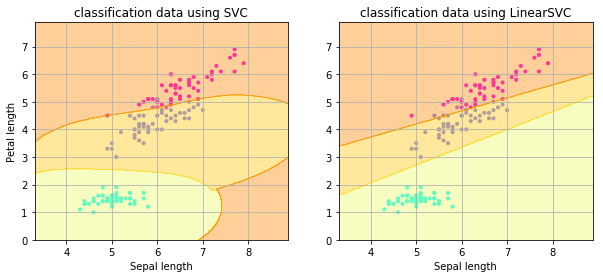

In [4]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model1 = SVC()
model2 = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習させる
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)


# 正解率の算出
print("非線形SVM: {}".format(model1.score(test_X, test_y)))
print("線形SVM: {}".format(model2.score(test_X, test_y)))


# 以下可視化の作業です
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using SVC")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using LinearSVC")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()


#### ヒント

- 線形SVMと非線形SVMは同じモジュールですが違う名前のモデルです。混同しないように注意しましょう。
- 値の比較は正解率を並べるだけで良いです。比較結果を算出する必要はありません。

#### 解答例

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model1 = SVC()
model2 = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習させる
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 正解率の算出
print("非線形SVM: {}".format(model1.score(test_X, test_y)))
print("線形SVM: {}".format(model2.score(test_X, test_y)))


# 以下可視化の作業です
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using SVC")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using LinearSVC")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()


***

### 1.2.4 決定木

#### 特徴

決定木はこれまで紹介したロジスティック回帰やSVMとは違い、データの要素（説明変数）の一つ一つに着目し、その要素内でのある値を境にデータを分割していくことでデータの属するクラスを決定しようとする手法です。
    
決定木では説明変数の一つ一つが目的変数にどのくらいの影響を与えているのかを見ることができます。
分割を繰り返すことで枝分かれしていきますが、先に分割される変数ほど影響力が大きいと捉えることができます。
    
欠点は線形分離可能なデータは苦手であること(例えば２次元データでは境界線が斜めに引けない)と、学習が教師データに寄りすぎる(汎化されない)ことです。


***
#### 実装
scikit-learnのtreeサブモジュールにある`DecisionTreeClassifier()`を用います。

```Python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの読み込み
from sklearn.tree import DecisionTreeClassifier

# モデルの構築
model = DecisionTreeClassifier()
# モデルの学習
model.fit(train_X, train_y)

# 正解率の算出
model.score(test_X, test_y)
```

同様の方法で境界を可視化させた結果は以下のようになります。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531861466620389.png">

軸に平行な境界が見られることがわかります。これは特徴の１つでもあります。

#### 問題

- 決定木を用いてデータの分類を学習し、test_Xとtest_yを用いてモデルの正解率を出力してください。
- 可視化されたグラフをみて、決定木アルゴリズムによる分離の様子を確認してください。

0.9555555555555556


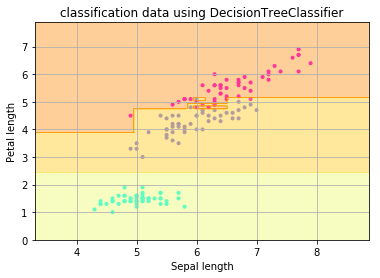

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください。


# モデルの構築
model = DecisionTreeClassifier()
# モデルの学習
model.fit(train_X, train_y)

# test_Xとtest_yを用いたモデルの正解率を出力
print (model.score(test_X, test_y))

# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using DecisionTreeClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


#### ヒント

- 複数回実行して、境界の性質を観察してみましょう。

#### 解答例

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み
from sklearn.tree import DecisionTreeClassifier

# モデルの構築
model = DecisionTreeClassifier()
# モデルの学習
model.fit(train_X, train_y)

# test_Xとtest_yを用いたモデルの正解率を出力
print(model.score(test_X, test_y))

# 以下可視化の作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using DecisionTreeClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


***

### 1.2.5 ランダムフォレスト

#### 特徴

ランダムフォレストは、前述の決定木の簡易版を複数作り、分類の結果を多数決で決める手法です。
複数の簡易分類器を一つの分類器にまとめて学習させる、 **アンサンブル学習** と呼ばれる学習の種類の一手法でもあります。
    
決定木では使用する説明変数は全て使用していたのに対し、ランダムフォレストの一つ一つの決定木はランダムに決められた少数の説明変数だけを用いてデータの属するクラスを決定しようとします。
その上で複数の簡易決定木から出力されるクラスのうちで最も多かったクラスを結果として出力します。
    
ランダムフォレストの特徴は決定木と同じように、線形分離可能でない複雑な識別範囲を持つデータ集合の分類が可能な点に加え、複数の分類器を通して多数決により結果を出力するため、外れ値によって予測結果が左右されにくいことが挙げられます。
    
欠点としては決定木と同じように説明変数の数に対してデータの数が少ないと二分木の分割ができず、予測の精度が下がってしまう点が挙げられます。


#### 実装

scikit-learnのensembleサブモジュールにある`RandomForestClassifier()`を用います。

```Python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの読み込み
from sklearn.ensemble import RandomForestClassifier

# モデルの構築
model = RandomForestClassifier()
# モデルの学習
model.fit(train_X, train_y)

# 正解率の算出
model.score(test_X, test_y)
```

以上について、境界を可視化した結果は以下のようになります。決定木と似たような境界をしていることがわかります。これは、ランダムフォレストが、決定木アルゴリズムのアンサンブル学習(個々に学習した複数の学習器を融合させて汎化性能を向上させること)をしているためです。
<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531861843551795.png">


#### 問題

次の問題を解いてください。
- ランダムフォレストを用いてデータの分類を学習し、test_Xとtest_yを用いてモデルの正解率を出力してください。
- また決定木でも正解率を出力し、値を比較してください。
- 可視化されたグラフをみて、決定木とランダムフォレストによる分離方法の様子を比較してください。

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み(import)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# モデルの構築
# ランダムフォレスト
model1 = 
# 決定木
model2 = 

# モデルの学習
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 正解率を算出
print("ランダムフォレスト: {}".format(model1.score(test_X, test_y)))
print("決定木: {}".format(model2.score(test_X, test_y)))

# 以下可視化作業です
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using RandomForestClassifier")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using DecisionTreeClassifier")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()


#### ヒント

`sklearn.ensemble`にある`RandomForestClassifier()`を用います。

#### 解答例

/usr/local/var/pyenv/versions/anaconda3-5.2.0/envs/py3.7.0/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ランダムフォレスト: 1.0
決定木: 0.9555555555555556


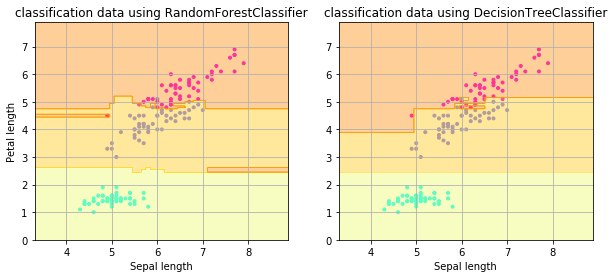

In [10]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)
print()
# 以下にコードを記述してください。
# モデルの読み込み(import)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# モデルの構築
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
# モデルの学習
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 正解率を算出
print("ランダムフォレスト: {}".format(model1.score(test_X, test_y)))
print("決定木: {}".format(model2.score(test_X, test_y)))

# 以下可視化作業です
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using RandomForestClassifier")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using DecisionTreeClassifier")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()


***

### 1.2.6 k-NN

#### 特徴

k-NNはk近傍法とも呼ばれ、予測をするデータと類似したデータをいくつか見つけ、多数決により分類結果を決める手法です。
怠惰学習と呼ばれる学習の種類の一手法であり、 **学習コスト（学習にかかる計算量）が0である** ことが特徴です。
    
これまで紹介してきた手法とは違い、k-NNは教師データから学習するわけではなく、 **予測時に教師データを直接参照** してラベルを予測します。
結果の予測を行う際の手法は以下の通りです。

1. 教師データを予測に用いるデータとの類似度で並べ直す。
2. 分類器に設定されたk個分のデータを類似度の高い順に参照する。
3. 参照された教師データが属するクラスのなかで最も多かったものを予測結果として出力する。
    
k-NNの特徴としては、前述の通り学習コストが0であること、アルゴリズムとしては比較的単純なものなのですが高い予測精度がでやすいこと、複雑な形の境界線も表現しやすいことが挙げられます。
欠点としては分類器に指定する自然数kの個数を増やしすぎると識別範囲の平均化が進み予測精度が下がってしまう点や、予測時に毎回計算を行うため教師データや予測データの量が増えると計算量が増えてしまい、低速なアルゴリズムとなってしまう点が挙げられます。
    
以下の画像は、kの数の違いによる分類過程の様子の違いを表しています。
灰色の点は **k=3の時では水色の点の方が周りに多いため水色の点だと予測** されますが、 **k=7の時では緑色の点の方が多いため緑色の点ではないかという予測** に変わります。

<img src="https://aidemyexcontentspic.blob.core.windows.net/contents-pic/5020_classification/classification_chap1_30.svg" width="300px">

#### 実装
scikit-learnのサブモジュールneighborsにある`KNeighborsClassifier()`を使います。
```Python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの読み込み
from sklearn.neighbors import KNeighborsClassifier

# モデルの構築
model = KNeighborsClassifier()
# モデルの学習
model.fit(train_X, train_y)

# 正解率の算出
model.score(test_X, test_y)
```

このモデルの境界を可視化したものは例えば以下のようになります。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1531862140308725.png">

比較的滑らかな境界曲線が得られました。

#### 問題

- k-NNを用いてデータの分類を学習し、test_Xとtest_yを用いてモデルの正解率を出力してください。
- 可視化されたグラフをみて、k-NNによる分離の様子を確認してください。

[[5.5 3.7]
 [6.3 5.1]
 [6.4 5.5]
 [6.6 4.4]
 [7.2 6.1]
 [5.7 4.2]
 [7.6 6.6]
 [5.6 4.5]
 [5.1 1.4]
 [7.7 6.7]
 [5.8 4.1]
 [5.2 1.4]
 [5.  1.3]
 [5.1 1.9]
 [5.  3.5]
 [6.3 4.9]
 [4.8 1.9]
 [5.  1.6]
 [5.1 1.7]
 [5.6 4.2]
 [5.1 1.5]
 [5.7 4.2]
 [7.7 6.7]
 [4.6 1.4]
 [6.2 4.3]
 [5.7 5. ]
 [5.5 1.4]
 [6.  4.8]
 [5.8 5.1]
 [6.  4. ]
 [5.4 4.5]
 [6.2 5.4]
 [5.5 4. ]
 [5.4 1.7]
 [5.  3.3]
 [6.4 5.3]
 [5.  1.4]
 [5.  1.2]
 [5.5 3.8]
 [6.7 5. ]
 [4.9 1.5]
 [5.8 5.1]
 [5.  1.5]
 [5.  1.6]
 [5.9 4.8]
 [5.1 3. ]
 [6.9 5.7]
 [6.  5.1]
 [6.1 5.6]
 [7.7 6.1]
 [5.5 4. ]
 [4.4 1.4]
 [4.3 1.1]
 [6.  5. ]
 [7.2 6. ]
 [4.6 1.5]
 [5.1 1.4]
 [4.4 1.3]
 [6.3 4.9]
 [6.3 5.6]
 [4.6 1.4]
 [6.8 5.5]
 [6.3 6. ]
 [4.7 1.3]
 [6.1 4.7]
 [6.5 4.6]
 [6.2 4.8]
 [7.  4.7]
 [6.4 5.3]
 [5.1 1.6]
 [6.9 5.4]
 [5.9 4.2]
 [6.5 5.2]
 [5.7 3.5]
 [5.2 3.9]
 [6.1 4.6]
 [4.5 1.3]
 [6.6 4.6]
 [5.5 4.4]
 [5.3 1.5]
 [5.6 4.1]
 [7.3 6.3]
 [6.7 5.7]
 [5.1 1.5]
 [4.9 3.3]
 [6.7 5.7]
 [7.2 5.8]
 [4.9 1.4]
 [6.7 5.6]
 [4.9 1.4]
 [6.9 4.9]

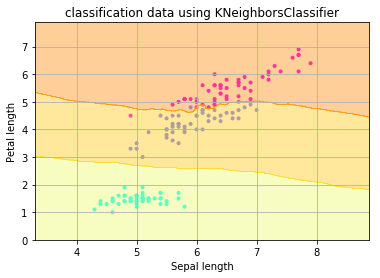

In [9]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み(import)
from sklearn.neighbors import KNeighborsClassifier

# モデルの構築
model = KNeighborsClassifier(n_neighbors=9)

# モデルの学習
model.fit(train_X, train_y)
print(train_X)
# 正解率の表示
print(model.score(test_X, test_y))

#print (X[:, 0])
# 以下可視化作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using KNeighborsClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


#### ヒント

- `sklearn.neighbors`にある`KNeighborsClassifier()`を用います。

#### 解答例

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み(import)
from sklearn.neighbors import KNeighborsClassifier

# モデルの構築
model = KNeighborsClassifier()
# モデルの学習
model.fit(train_X, train_y)

# 正解率の表示
print(model.score(test_X, test_y))

# 以下可視化作業です
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape((xx1.shape))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using KNeighborsClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()


***